In [0]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

X = pd.read_csv('feature_martix.csv')
Y = pd.read_csv('label_matrix.csv')

In [0]:
main_data = pd.concat([X, Y], axis=1)
main_data = main_data.reindex(np.random.permutation(X.index))
dfs = np.split(main_data, [312], axis=1)
X = dfs[0]
Y = dfs[1]
a = Y.values.reshape(11787)
neww = tf.one_hot(a,200)
sess = tf.Session()
Y = neww.eval(session=sess)

0 0.0046948357 56559.684
100 0.06760564 40224.45
200 0.20492958 31897.799
300 0.31807512 25898.574
400 0.4043427 21893.52
500 0.47488263 18820.016
600 0.52769953 16629.78
700 0.56596243 14972.74
800 0.5995305 13586.751
900 0.62065727 12571.948
1000 0.6532864 11536.439
1100 0.6690141 10753.497
1200 0.6976526 10013.795
1300 0.7106807 9401.833
1400 0.7300469 8780.498
1500 0.74776995 8213.732
1600 0.76115024 7765.8594
1700 0.7754695 7285.199
1800 0.77758217 7012.6157
1900 0.79964787 6495.7114
2000 0.803169 6275.5176
2100 0.81408453 5882.683
2200 0.8221831 5603.6816
2300 0.8335681 5252.247
2400 0.83685446 5062.2964
2500 0.84424883 4829.679
2600 0.8577465 4524.5825
2700 0.86549294 4269.1035
2800 0.87147886 4086.4177
2900 0.8720657 3920.1501
3000 0.88192487 3705.9946
3100 0.88568074 3581.234
3200 0.890493 3390.0435
Accuracy on training set is  0.89870894
Accuracy on test set is 0.61776423


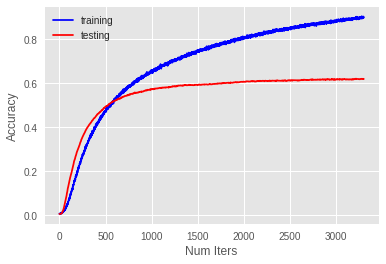

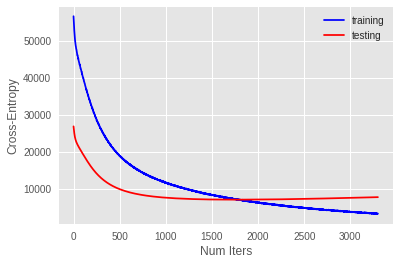

In [147]:
# hyperparameters
lr = 0.0002
num_iters = 3300
K = 250
L = 250
n = 11787
pkeep = tf.placeholder(tf.float32)

# model creation
x = tf.placeholder(tf.float32, shape=[None, 312])
Y_ = tf.placeholder(tf.float32, shape=[None, 200])


w1 = tf.Variable(tf.truncated_normal([312, K], stddev=0.1))
b1 = tf.Variable(tf.ones([K]))

w2 = tf.Variable(tf.truncated_normal([K, 200], stddev=0.1))
b2 = tf.Variable(tf.ones([200]))

#w3 = tf.Variable(tf.truncated_normal([L, 200], stddev=0.1))
#b3 = tf.Variable(tf.zeros([200]))

# layers
y1 = tf.nn.relu(tf.matmul(x, w1) + b1)
do1 = tf.nn.dropout(y1, pkeep)

#y2 = tf.nn.relu(tf.matmul(do1, w2) + b2)
#do2 = tf.nn.dropout(y2, pkeep)

y = tf.nn.softmax(tf.matmul(do1, w2) + b2)

# loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(y), name = 'cross-entropy')
 
is_correct = tf.equal(tf.argmax(Y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# training algo.
train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(cross_entropy)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

aaa = []
mmm = []
ccc = []
att = []
testccc = []
# training
for i in range(num_iters):
    train_data = {x: X[0:8520], Y_: Y[0:8520], pkeep:0.75}
    
    sess.run(train_step, feed_dict=train_data)
    
    atr, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    
    test_data = {x: X[7520:], Y_: Y[7520:], pkeep:1}
    at, ac = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    
    aaa.append(atr)
    mmm.append(i)
    ccc.append(c)
    att.append(at)
    testccc.append(ac)
    
    if(i%100 == 0):
      print(i, atr, c)

print('Accuracy on training set is ', atr)

print('Accuracy on test set is', at)

style.use('ggplot')
plt.plot(mmm,aaa,color='b',label='training')
plt.plot(mmm,att,color='r',label='testing')
plt.xlabel('Num Iters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(mmm,ccc,color='b',label='training')
plt.plot(mmm, testccc,color='r', label='testing')
plt.xlabel('Num Iters')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()